###Importing the libraries

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Importing the dataset

In [153]:
dataset = pd.read_csv('output.csv')
dataset.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [154]:
x = dataset.drop(['Number', 'Anaemic'], axis=1)
y = dataset['Anaemic']

In [155]:
x.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,M,43.2555,30.8421,25.9025,6.3
1,F,45.6033,28.1900,26.2067,13.5
2,F,45.0107,28.9677,26.0215,11.7
3,F,44.5398,28.9899,26.4703,13.5
4,M,43.2870,30.6972,26.0158,12.4


In [156]:
y.head()

,Anaemic
0,Yes
1,No
2,No
3,No
4,No


###Checking missing values

In [157]:
print(pd.isnull(x).sum())

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
dtype: int64


In [158]:
print(pd.isnull(y).sum())

0


###Encoding categorical data

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.iloc[:,0] = le.fit_transform(x.iloc[:,0])

In [160]:
x

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,2,43.2555,30.8421,25.9025,6.3
1,0,45.6033,28.1900,26.2067,13.5
2,1,45.0107,28.9677,26.0215,11.7
3,0,44.5398,28.9899,26.4703,13.5
4,3,43.2870,30.6972,26.0158,12.4
...,...,...,...,...,...
99,1,49.9999,29.2860,20.7141,14.5
100,3,42.2324,30.6757,27.0919,6.3
101,0,45.6064,31.9084,22.4852,12.7
102,3,45.2095,29.2769,25.5136,13.4


###Splitting data into train and test

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

###Feature scaling

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Model training

In [163]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

###Model scores train and test scores

In [164]:
print("train_accuracy:",classifier.score(x_train,y_train))
print("test_accuracy:",classifier.score(x_test,y_test))

train_accuracy: 1.0
test_accuracy: 0.96875


###Cross validation score

In [165]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x, y, cv=5)
print("Cross-validation accuracy:", np.mean(scores))

Cross-validation accuracy: 0.9414285714285713


###Model evaluation

In [166]:
y_pred = classifier.predict(x_test)

###Comparing results test and predict

In [167]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)), 1))

[['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ['No' 'Yes']
 ['No' 'No']
 ['No' 'No']]


###Confusion matrix

<Axes: >

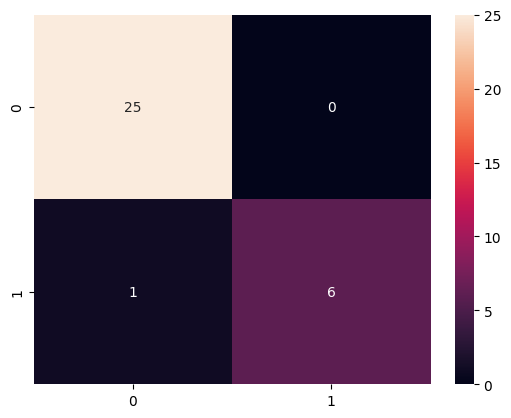

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

###Data visualization test and predicted line

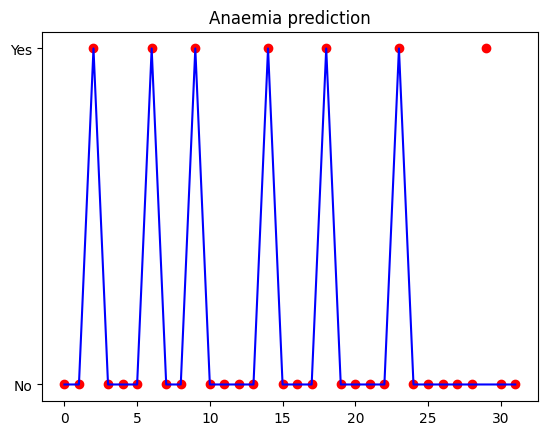

In [169]:
plt.title('Anaemia prediction')
plt.scatter(range(len(y_test.values)), y_test.values, color='red')
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.show()

###Accuracy

In [170]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
print(f"The Accuracy of the model is: {accuracy}%")

The Accuracy of the model is: 96.88%
